## **Edge Detection**


- **Laplacian**
- **Sobel**
- **Canny**


In [3]:
import numpy as np
import cv2

image = cv2.imread("../Data/Images/edges.jpg", 0)

#### **Function for Display Images and Titles in a Dynamic Grid Layout**


In [5]:
import matplotlib.pyplot as plt

plt.style.use("grayscale")


def display_images(
    images: list, titles: list = None, rows=1, figsize=None, cmap="gray"
):
    size = len(images)
    cols = (size + rows - 1) // rows

    plt.figure(figsize=figsize)
    for i in range(size):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap)
        plt.axis("off")
        if titles:
            plt.title(titles[i])

    plt.tight_layout()
    plt.show()

---


#### **Laplacian**

- **Doc:** https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html


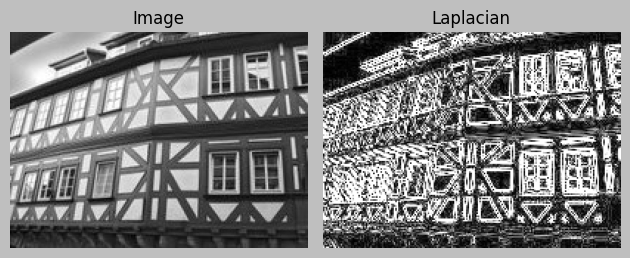

In [6]:
laplacian_img = cv2.Laplacian(image, ddepth=cv2.CV_64F, ksize=3)
laplacian_img = cv2.convertScaleAbs(laplacian_img)

display_images([image, laplacian_img], ["Image", "Laplacian"])

---


#### **Sobel**

- **Doc:** https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html


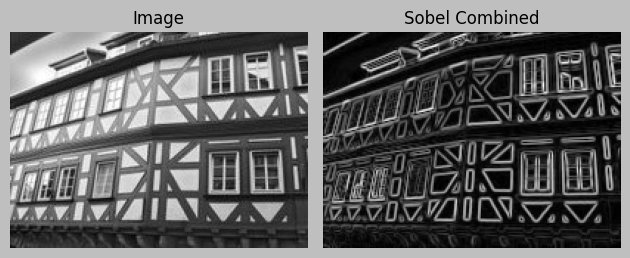

In [4]:
# Apply Sobel Edge Detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

# Convert gradients to absolute values and combine
sobel_combined = cv2.magnitude(sobelx, sobely)

# Normalize and convert to uint8
sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

display_images(
    [image, sobel_combined],
    ["Image", "Sobel Combined"],
)

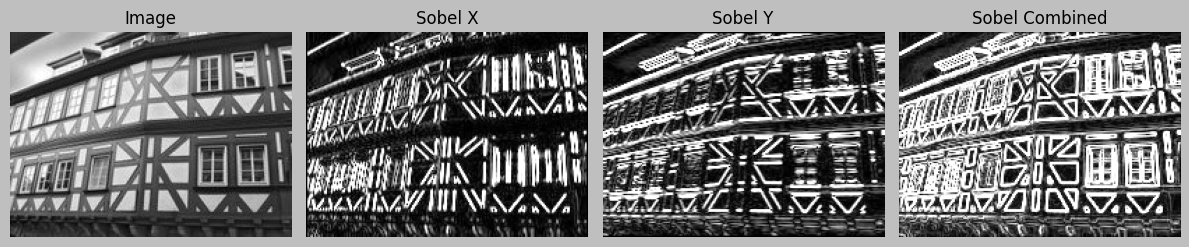

In [5]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)

sobel_y = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_y = cv2.convertScaleAbs(sobel_y)

sobel_combined_img = cv2.bitwise_or(sobel_x, sobel_y)
display_images(
    [image, sobel_x, sobel_y, sobel_combined_img],
    ["Image", "Sobel X", "Sobel Y", "Sobel Combined"],
    figsize=(12, 4),
)

---


#### **Canny**

- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
- https://www.youtube.com/watch?v=c_1tSWP6PfY


Canny Edge Detection is a multi-step process used in computer vision to detect edges in an image. It is an efficient algorithm that identifies edges by detecting areas of rapid intensity change. Here's a breakdown of the steps involved:

---

##### **1. Noise Reduction**

- **Why**: Edge detection is sensitive to noise, so the first step is to reduce noise in the image.
- **How**: Apply a **Gaussian Blur** to the image to smooth it.
  - Example: `cv2.GaussianBlur(image, (5, 5), 1.4)` in OpenCV.
- **Effect**: Reduces random noise while preserving edges.

---

##### **2. Gradient Calculation**

- **Why**: To identify the intensity gradient (changes in pixel intensity).
- **How**: Use the Sobel operator to compute the gradient in the horizontal (Gx) and vertical (Gy) directions.
  - Example: `cv2.Sobel(image, cv2.CV_64F, 1, 0)` for Gx and `cv2.Sobel(image, cv2.CV_64F, 0, 1)` for Gy.
- **Output**:
  - Magnitude of Gradient: $G = \sqrt{G_x^2 + G_y^2}$
  - Direction of Gradient: $\theta = \arctan(\frac{G_y}{G_x})$

---

##### **3. Non-Maximum Suppression**

- **Why**: To thin out the edges, ensuring only the sharpest edges are preserved.
- **How**: For each pixel:
  - Compare its gradient magnitude with its neighbors in the gradient direction.
  - Suppress (set to 0) pixels that are not local maxima.
- **Effect**: Produces thin edges.

---

##### **4. Double Threshold**

- **Why**: To classify edges into strong, weak, or non-edges based on intensity.
- **How**:
  - Define two thresholds: **High Threshold** and **Low Threshold**.
  - Pixels with intensity > High Threshold are **strong edges**.
  - Pixels with intensity < Low Threshold are **non-edges**.
  - Pixels in between are **weak edges**.
- **Effect**: Distinguishes significant edges from noise.

---

##### **5. Edge Tracking by Hysteresis**

- **Why**: To determine if weak edges are part of strong edges.
- **How**:
  - Start from strong edges and trace along weak edges that are connected to them.
  - Discard weak edges that are not connected to strong edges.
- **Effect**: Final edge map with edges that are likely to represent boundaries in the image.

---

##### **Applications**

- Object detection
- Image segmentation
- Edge-based shape analysis


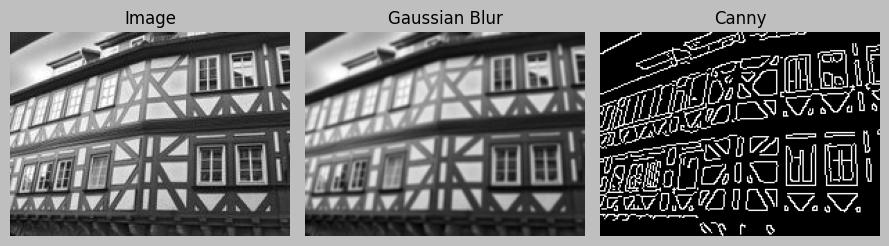

In [6]:
# Step 1: Noise Reduction
gaussian_blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Step 2: Apply Canny Edge Detection
canny_edges = cv2.Canny(gaussian_blurred, threshold1=100, threshold2=200)

display_images(
    [image, gaussian_blurred, canny_edges],
    ["Image", "Gaussian Blur", "Canny"],
    figsize=(9, 5),
)

**Canny With Trackbar**


In [7]:
def canny(image, ksize: tuple, threshold1: int, threshold2: int):
    # Step 1: Noise Reduction
    gaussian_blurred = cv2.GaussianBlur(image, ksize, 0)
    # Step 2: Apply Canny Edge Detection
    canny_edges = cv2.Canny(gaussian_blurred, threshold1, threshold2)
    return canny_edges

In [8]:
import cv2

image = cv2.imread("../Data/Images/edges.jpg", 0)
winname = "Edge Detection"
cv2.namedWindow(winname)


# Create trackbars for RGB channels and ON/OFF state
cv2.createTrackbar("Th_1", winname, 100, 500, lambda _: None)
cv2.createTrackbar("Th_2", winname, 200, 500, lambda _: None)
cv2.createTrackbar("KS", winname, 3, 33, lambda _: None)
cv2.setTrackbarMin("KS", winname, 3)


while True:
    th_1 = cv2.getTrackbarPos("Th_1", winname)
    th_2 = cv2.getTrackbarPos("Th_2", winname)
    k_size = cv2.getTrackbarPos("KS", winname)

    if k_size % 2 == 0:
        k_size += 1
        cv2.setTrackbarPos("KS", winname, k_size)

    canny_img = canny(image, (k_size, k_size), th_1, th_2)

    combined_img = cv2.hconcat([image, canny_img])
    cv2.imshow(winname, combined_img)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

    if not cv2.getWindowProperty(winname, cv2.WND_PROP_VISIBLE):
        break

cv2.destroyAllWindows()

---


#### **Plot All the Above Edge Detection Methods**


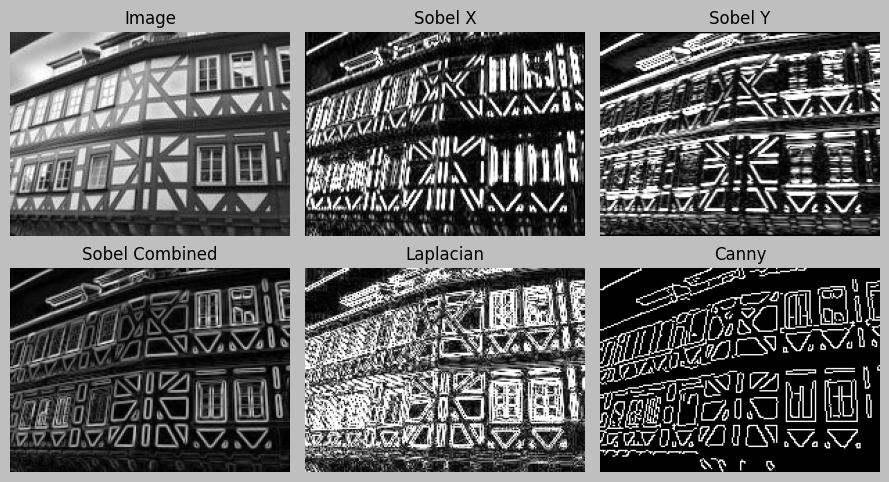

In [9]:
images = [
    image,
    sobel_x,
    sobel_y,
    sobel_combined,
    laplacian_img,
    canny_edges,
]
titles = [
    "Image",
    "Sobel X",
    "Sobel Y",
    "Sobel Combined",
    "Laplacian",
    "Canny",
]

display_images(images, titles, rows=2, figsize=(9, 5))